In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn")

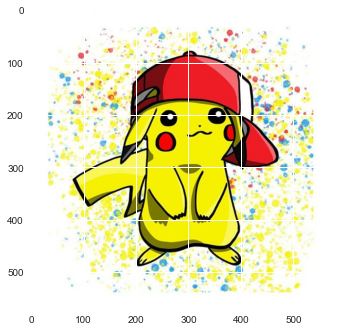

In [3]:
#Reading an image

top_left = cv2.imread("./top_left.jpg")
top_left = cv2.cvtColor(top_left, cv2.COLOR_BGR2RGB)
plt.imshow(top_left)

In [4]:
#Initialising main canvas

mainCanvas = np.array([[[0 for i in range(3)] for j in range(430)] for k in range(430)])
mainCanvas.shape

(430, 430, 3)

In [5]:
#Reading the other images

top_right = cv2.cvtColor(cv2.imread("./top_right.jpg"), cv2.COLOR_BGR2RGB)
bottom_right = cv2.cvtColor(cv2.imread("./bottom_right.jpg"), cv2.COLOR_BGR2RGB)
bottom_left = cv2.cvtColor(cv2.imread("./bottom_left.jpg"), cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Top Left(200, 200, 3)')

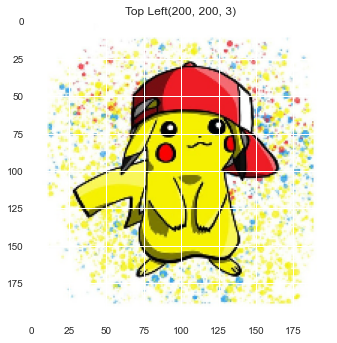

In [6]:
top_left = cv2.resize(top_left, (200, 200))
plt.imshow(top_left)
plt.title("Top Left" + str(top_left.shape))

In [7]:
top_right = cv2.resize(top_right, (200, 200))
bottom_right = cv2.resize(bottom_right, (200, 200))
bottom_left = cv2.resize(bottom_left, (200, 200))

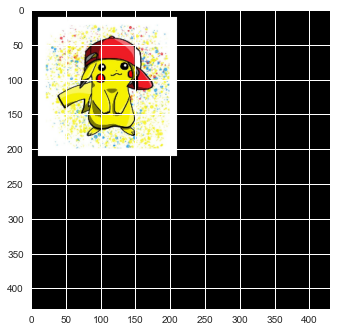

In [8]:
#Adding top left image to canvas

mainCanvas[10:210, 10:210] = top_left
plt.imshow(mainCanvas)

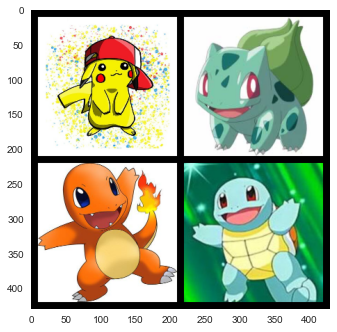

In [9]:
#Adding other images to canvas

mainCanvas[10:210, 220:420] = top_right
mainCanvas[220:420, 10:210] = bottom_left
mainCanvas[220:420, 220:420] = bottom_right
plt.grid(False)
plt.imshow(mainCanvas)

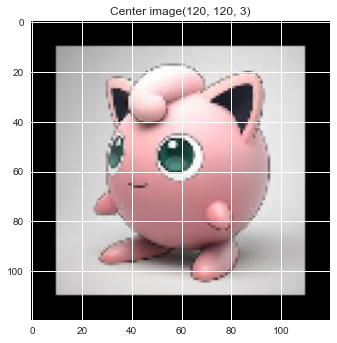

In [10]:
centerImage = cv2.cvtColor(cv2.imread("./center.jpeg"), cv2.COLOR_BGR2RGB)
centerImage = cv2.resize(centerImage, (100,100))

centerCanvas = np.array([[[0 for i in range(3)] for j in range(120)] for k in range(120)])

centerCanvas[10:110, 10:110] = centerImage

plt.imshow(centerCanvas)
plt.title("Center image" + str(centerCanvas.shape))
plt.show()

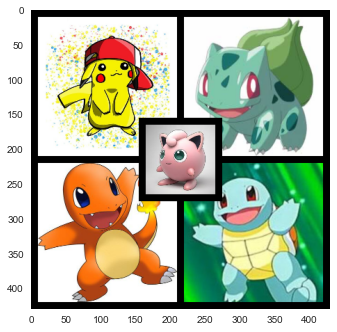

In [11]:
mainCanvas[155:275, 155:275] = centerCanvas
plt.imshow(mainCanvas)
plt.grid(False)
plt.show()

In [12]:
#Making a dataframe

df = pd.DataFrame(mainCanvas.reshape(-1, 3), columns=['r', 'g', 'b'])
df.head()

,r,g,b
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [13]:
#Save File to pc

df.to_csv("output.csv", index=False)

In [14]:
cv2.imwrite("./outputImage.jpg", mainCanvas)

True